In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import random 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/Project%20Classification/datasets_63324_123030_Churn_Modelling.csv'
df = pd.read_csv(url)

#https://www.kaggle.com/sonalidasgupta95/churn-prediction-of-bank-customers

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

**ข้อ 2**

In [ ]:
df.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2670,2671,15760446,Pagnotto,598,France,Female,64,9,0.00,1,0,1,13181.37,1
4436,4437,15664498,Golovanov,508,France,Male,26,7,205962.00,1,1,0,156424.40,0
4032,4033,15593555,Chinedum,430,France,Male,38,9,0.00,2,1,1,12050.77,0
751,752,15634245,Muecke,758,Germany,Female,47,9,95523.16,1,1,0,73294.48,0


In [ ]:
df.head(10)

In [ ]:
df.tail(10)

**ข้อ 3**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**ข้อ 6**

In [ ]:
df.drop(df.columns[[0,1]],axis=1,inplace=True)

**ข้อ 14**

In [ ]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


**ข้อ 15**

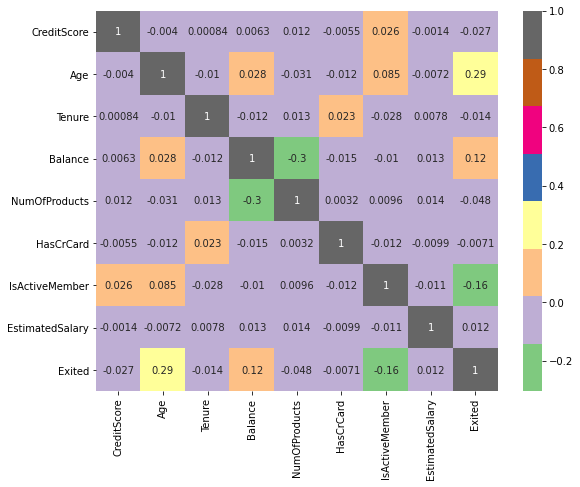

In [ ]:
fig = plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='Accent',annot= True)

**ข้อ 4**

In [ ]:
sns.pairplot(df,kind='reg',corner=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**ข้อ 7 ,9 ,10 ,16 ,18 ,19**

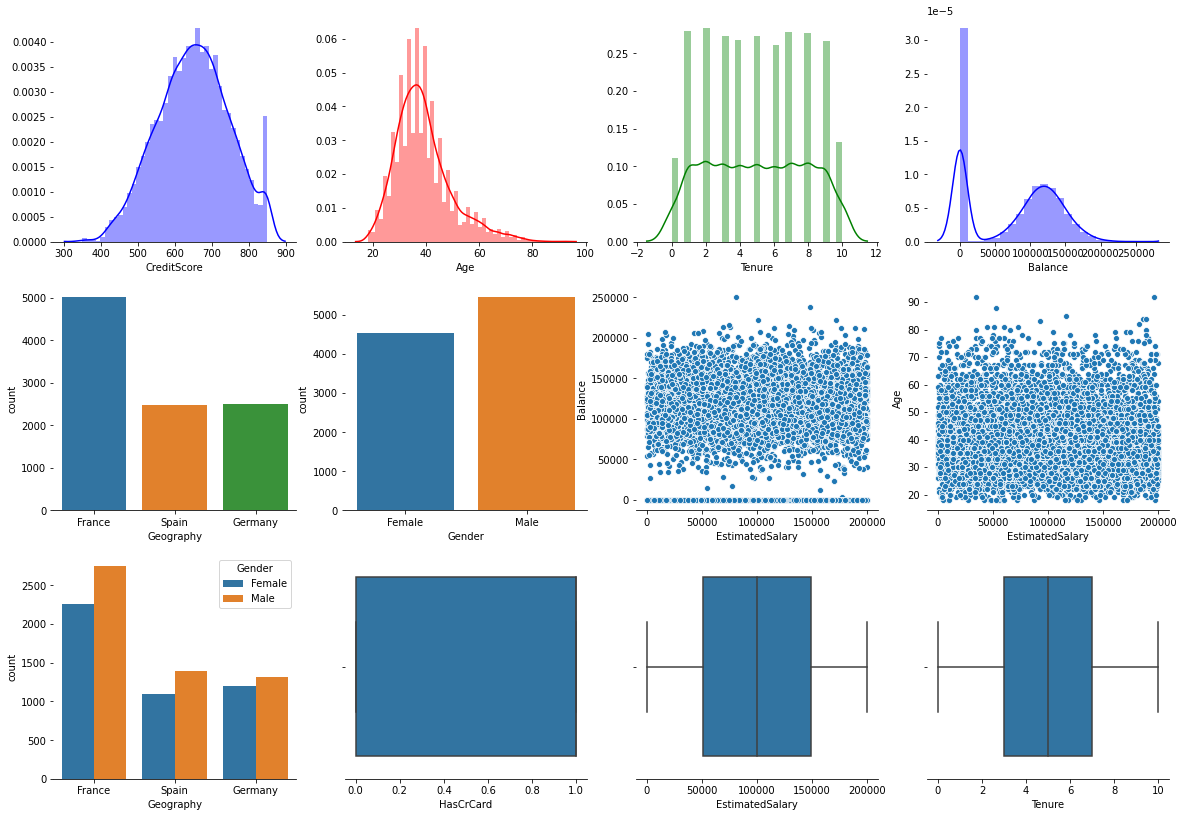

In [9]:
f, axes = plt.subplots(3, 4, figsize=(20, 14), sharex=False)
sns.despine(left=True)

sns.distplot(df.iloc[:,3], kde=True, color="b", ax=axes[0,0])
sns.distplot(df.iloc[:,6], kde=True, color="r", ax=axes[0,1])
sns.distplot(df.iloc[:,7], kde=True, color="g", ax=axes[0,2])
sns.distplot(df.iloc[:,8], kde=True, color="b", ax=axes[0,3])

sns.countplot(df.iloc[:,4], ax=axes[1, 0])
sns.countplot(df.iloc[:,5], ax=axes[1, 1])
sns.scatterplot(x=df.iloc[:,12],y=df.iloc[:,8],data=df, ax=axes[1, 2])
sns.scatterplot(x=df.iloc[:,12],y=df.iloc[:,6],data=df, ax=axes[1, 3])

sns.countplot(df.iloc[:,4], ax=axes[2, 0],hue= df.iloc[:,5])
sns.boxplot(df.iloc[:,10],ax=axes[2, 1])
sns.boxplot(df.iloc[:,12],ax=axes[2, 2])
sns.boxplot(df.iloc[:,7],ax=axes[2, 3])


**ข้อ 8**

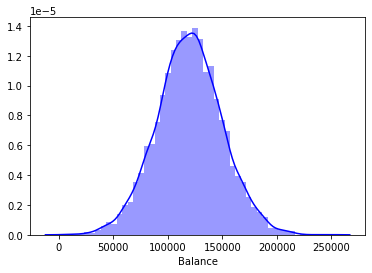

In [ ]:
#df[df.iloc[:,6]!=0]
sns.distplot(df[df.iloc[:,6]!=0].iloc[:,6], kde=True, color="b")

**ข้อ 11**

In [ ]:
df.iloc[:,0].value_counts()

Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
               ..
Smeaton         1
Deleon          1
Celis           1
Stonebraker     1
Sparks          1
Name: Surname, Length: 2932, dtype: int64

**ข้อ 12**

In [ ]:
df.iloc[:,0].value_counts()[df.iloc[:,0].value_counts()>1]

Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
               ..
Fitzgerald      2
Somerville      2
Chiefo          2
Nwagugheuzo     2
Barton          2
Name: Surname, Length: 1374, dtype: int64

**ข้อ 13**

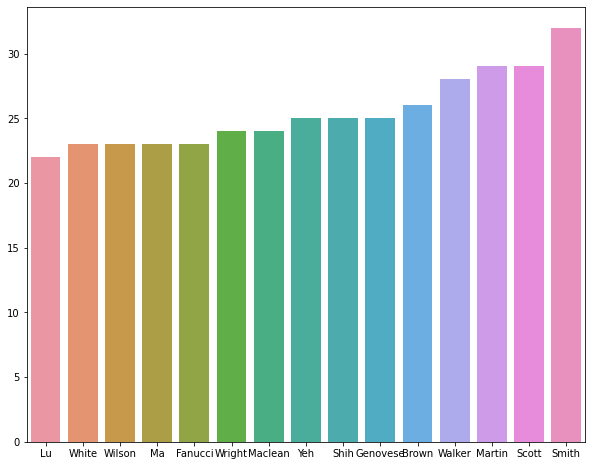

In [ ]:
index = df.iloc[:,0].value_counts().head(15)[::-1].index
values = df.iloc[:,0].value_counts().head(15)[::-1].values

fig = plt.figure(figsize=(10,8)) 
sns.barplot(x = index,y=values)
fig.autofmt_xdate()

**ข้อ 16**

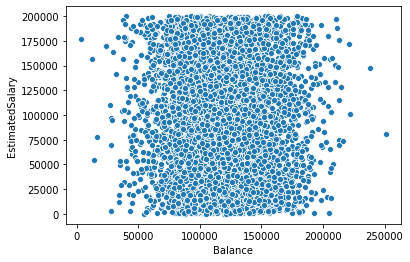

In [ ]:
sns.scatterplot(x=df[df.iloc[:,6]!=0].iloc[:,6],y=df[df.iloc[:,6]!=0].iloc[:,10],data=df[df.iloc[:,6]!=0])

**ข้อ 20**

In [ ]:
df[df.iloc[:,2]=='France'][df.columns[3]].value_counts()

Male      2753
Female    2261
Name: Gender, dtype: int64

In [ ]:
df[df.iloc[:,2]=='Spain'][df.columns[3]].value_counts()

Male      1388
Female    1089
Name: Gender, dtype: int64

In [ ]:
df[df.iloc[:,2]=='Germany'][df.columns[3]].value_counts()

**ข้อ 22**

In [ ]:
fig = plt.figure(figsize=(8,8))
fig = px.pie(df,values = df.iloc[:,11],names = df.iloc[:,2])
fig.show()

<Figure size 576x576 with 0 Axes>

**ข้อ 23**

In [ ]:
df.groupby(df.iloc[:,2]).sum()

fig = plt.figure(figsize=(7,7))
fig = px.bar(df.groupby(df.iloc[:,2]).sum(),y=df.groupby(df.iloc[:,2]).sum().iloc[:,8],x=df.groupby(df.iloc[:,2]).sum().index)
fig.show() 

<Figure size 504x504 with 0 Axes>

**ข้อ 25**

In [ ]:
df.groupby(df.iloc[:,2]).mean()

fig = plt.figure(figsize=(8,8))
fig = px.pie(df.groupby(df.iloc[:,2]).mean(),values = df.groupby(df.iloc[:,2]).mean().iloc[:,8],names = df.groupby(df.iloc[:,2]).mean().index)
fig.show()

<Figure size 576x576 with 0 Axes>

**ข้อ 26**

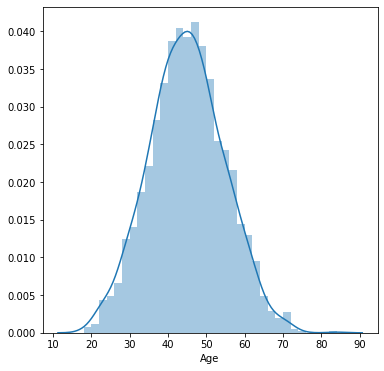

In [ ]:
df[df.iloc[:,11]==1]

fig = plt.figure(figsize=(6,6))
sns.distplot(df[df.iloc[:,11]==1].iloc[:,4])

In [ ]:
#df1 = df.groupby(df.iloc[:,4]).mean()

df1=df
df1['rangeage'] = pd.cut(df1.iloc[:,4],[17,27,95])


In [ ]:
df2 = df1[(df1['rangeage'] == pd.Interval(17, 27))].groupby(df1.columns[4]).mean()
df2

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,
18,686.681818,4.818182,79169.575000,1.500000,0.636364,0.590909,85102.389545,0.090909
19,665.629630,5.074074,70502.539630,1.370370,0.814815,0.555556,97734.100370,0.037037
20,665.050000,5.075000,76038.890000,1.550000,0.650000,0.475000,97705.542000,0.050000
21,647.283019,4.773585,75926.882830,1.660377,0.716981,0.603774,102536.673774,0.056604
22,636.547619,5.678571,68213.748810,1.523810,0.690476,0.547619,98321.615476,0.142857
23,657.777778,5.414141,78528.569899,1.525253,0.676768,0.454545,110148.368485,0.060606
24,653.704545,5.030303,72824.278182,1.507576,0.689394,0.522727,107179.807424,0.106061
25,642.818182,5.155844,78282.264740,1.616883,0.714286,0.545455,98793.466688,0.038961
26,648.785000,4.985000,79573.747450,1.515000,0.695000,0.505000,102439.511500,0.070000


In [ ]:
fig = px.scatter(df2,x=df2.index,y=df2.iloc[:,6],size=df2.iloc[:,2],color=df2.iloc[:,0])
fig.show()

**ข้อ 28**

In [ ]:
df.groupby(df.iloc[:,7]).mean()

fig = px.bar(df.groupby(df.iloc[:,7]).mean(),x=df.groupby(df.iloc[:,7]).mean().index,y=df.groupby(df.iloc[:,7]).mean().iloc[:,8])
fig.update_layout(xaxis_title = 'Num of product',yaxis_title = 'exited')
fig.show()

**ข้อ 29**

In [ ]:
df.groupby(df.iloc[:,3]).mean()

fig = px.bar(df.groupby(df.iloc[:,3]).mean(),x=df.groupby(df.iloc[:,3]).mean().index,y=df.groupby(df.iloc[:,3]).mean().iloc[:,8])
fig.update_layout(xaxis_title = 'gender',yaxis_title = 'exited')
fig.show()

In [ ]:
df.sample(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,rangeage
8581,McIntyre,585,France,Female,43,2,0.00,2,1,0,89402.54,0,"(27, 95]"
3754,Bellucci,535,Spain,Male,35,8,118989.92,1,1,1,135536.72,0,"(27, 95]"


**ข้อ 30**

In [ ]:
px.box(df,y = df.iloc[:,1])

<Figure size 432x432 with 0 Axes>

In [ ]:
px.box(df,y = df.iloc[:,4])

**ข้อ 31**

In [ ]:
df.iloc[:,4] = [62 if x>62 else x for x in df.iloc[:,4]]
px.box(df,y = df.iloc[:,4])

In [ ]:
df.iloc[:,1] = [383 if x<383 else x for x in df.iloc[:,1]]
px.box(df,y = df.iloc[:,1])

**ข้อ 32**

In [ ]:
df.rename(columns={'Exited':'Churn'},inplace=True)

**ข้อ 33**

In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 2.3 get one hot df

**ข้อ 34**

In [ ]:
df_real = pd.get_dummies(df,drop_first=True)

In [ ]:
df_real.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_Germany,Geography_Spain,Gender_Male
980,594,27,0,197041.8,1,0,0,151912.49,0,0,0,1
8611,596,30,1,0.0,2,1,0,8125.39,0,0,1,0
7541,723,28,4,0.0,2,1,1,123885.88,0,0,0,1


In [ ]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Churn              10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


**ข้อ 35**

In [ ]:
label_col = 8 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code #32

X = df_real.drop(df_real.columns[label_col],axis=1)
y = df_real.iloc[:,[label_col]]

X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

**ข้อ 36**

In [ ]:
lg = LogisticRegression()

lg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**ข้อ 37**

In [ ]:
y_predict = lg.predict(X_test)

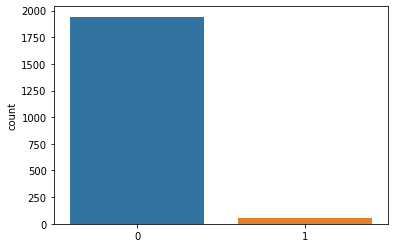

In [ ]:
sns.countplot(y_predict)

**ข้อ 38**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1556,   32],
       [ 386,   26]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(0.791, 0.11063829787234043, 0.4482758620689655, 0.06310679611650485)

**ข้อ 39**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**ข้อ 40**

In [ ]:
y_predict = knn.predict(X_test)

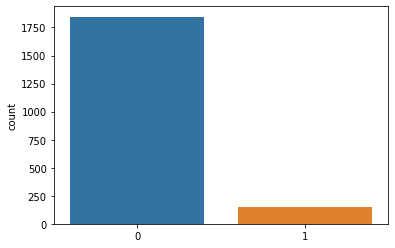

In [ ]:
sns.countplot(y_predict)

**ข้อ 41**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1470,  118],
       [ 376,   36]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(0.753, 0.12720848056537104, 0.23376623376623376, 0.08737864077669903)

**ข้อ 42**

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**ข้อ 43**

In [ ]:
y_predict = svc.predict(X_test)

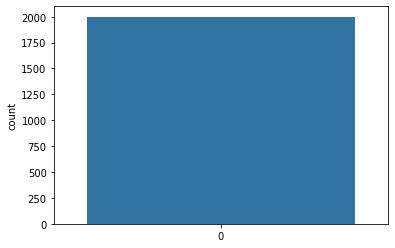

In [ ]:
sns.countplot(y_predict)

**ข้อ 44**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1588,    0],
       [ 412,    0]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



(0.794, 0.0, 0.0, 0.0)

**ข้อ 46**

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB(priors=None, var_smoothing=1e-09)

**ข้อ 47**

In [ ]:
y_predict = nb.predict(X_test)

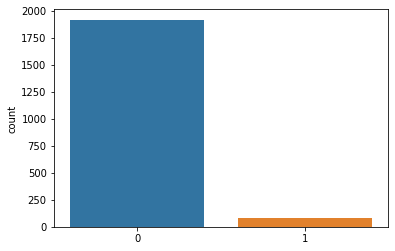

In [ ]:
sns.countplot(y_predict)

**ข้อ 48**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1536,   52],
       [ 379,   33]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(0.7845, 0.13279678068410464, 0.38823529411764707, 0.08009708737864078)

**ข้อ 49**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**ข้อ 50**

In [ ]:
y_predict = dt.predict(X_test)

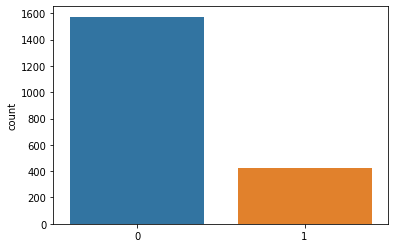

In [ ]:
sns.countplot(y_predict)

**ข้อ 51**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1373,  215],
       [ 201,  211]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(0.792, 0.5035799522673031, 0.4953051643192488, 0.5121359223300971)

**ข้อ 52**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**ข้อ 53**

In [ ]:
y_predict = rf.predict(X_test)

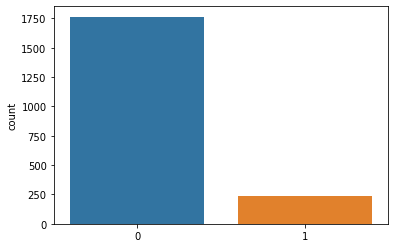

In [ ]:
sns.countplot(y_predict)

**ข้อ 54**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1534,   54],
       [ 231,  181]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(0.8575, 0.5595054095826894, 0.7702127659574468, 0.4393203883495146)

**ข้อ 55**

In [ ]:
rows = ['lg','knn','svc','nb','dt','rf']
columns = ['acc','f1','ps','rs']
values = [[0.791, 0.11063829787234043, 0.4482758620689655, 0.06310679611650485],
          [0.753, 0.12720848056537104, 0.23376623376623376, 0.08737864077669903],
          [0.794, 0.0, 0.0, 0.0],
          [0.7845, 0.13279678068410464, 0.38823529411764707, 0.08009708737864078],
          [0.792, 0.5035799522673031, 0.4953051643192488, 0.5121359223300971],
          [0.8575, 0.5595054095826894, 0.7702127659574468, 0.4393203883495146]]

df_compare = pd.DataFrame(data=values,columns=columns,index=rows)

In [ ]:
df_compare

,acc,f1,ps,rs
lg,0.7910,0.110638,0.448276,0.063107
knn,0.7530,0.127208,0.233766,0.087379
svc,0.7940,0.000000,0.000000,0.000000
nb,0.7845,0.132797,0.388235,0.080097
dt,0.7920,0.503580,0.495305,0.512136
rf,0.8575,0.559505,0.770213,0.439320


In [ ]:
fig = px.bar(df_compare,x=df_compare.index,y=df_compare.iloc[:,0],title='accuracy_score')
fig.show()

In [ ]:
fig = px.bar(df_compare,x=df_compare.index,y=df_compare.iloc[:,1],title='f1_score')
fig.show()

In [ ]:
fig = px.bar(df_compare,x=df_compare.index,y=df_compare.iloc[:,2],title='precision_score')
fig.show()

In [ ]:
fig = px.bar(df_compare,x=df_compare.index,y=df_compare.iloc[:,3],title='recall_score')
fig.show()

**ข้อ 56**

In [ ]:
min_max_sc = MinMaxScaler()

In [ ]:
df_mm = min_max_sc.fit_transform(df_real)
df_nor = pd.DataFrame(df_mm,columns=df_real.columns)

df_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Churn              10000 non-null  float64
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


In [ ]:
label_col = 8 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code #32

X = df_real.drop(df_real.columns[label_col],axis=1)
y = df_real.iloc[:,[label_col]]

X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**ข้อ 57**

In [ ]:
y_predict = svc.predict(X_test)

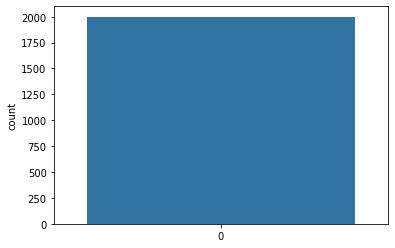

In [ ]:
sns.countplot(y_predict)

**ข้อ 58**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1588,    0],
       [ 412,    0]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



(0.794, 0.0, 0.0, 0.0)

**ข้อ 59**

In [ ]:
param_com = {'C':[100,1000,10000],'gamma':[0.00001,0.0001,0.001]}
grid_search = GridSearchCV(svc,param_com)

In [ ]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'C': 100, 'gamma': 0.001}

In [ ]:
grid_search.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**ข้อ 60**

In [ ]:
y_predict = grid_search.predict(X_test)

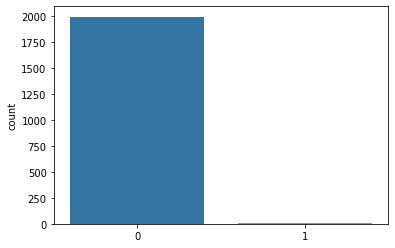

In [ ]:
sns.countplot(y_predict)

**ข้อ 61**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1581,    7],
       [ 411,    1]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(0.791, 0.0047619047619047615, 0.125, 0.0024271844660194173)

**ข้อ 62**

In [ ]:
param_grid = {'max_depth':[4,8],
              'max_features':[4,8],
              'n_estimators':[50,100],
              'min_samples_split':[2,3]}
grid_search = GridSearchCV(rf,param_grid)

In [ ]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/s

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**ข้อ 63**

In [ ]:
y_predict = grid_search.predict(X_test)

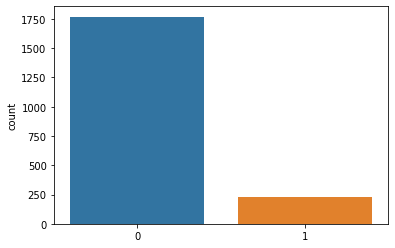

In [ ]:
sns.countplot(y_predict)

**ข้อ 64**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1533,   55],
       [ 236,  176]])

In [ ]:
accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(0.8545, 0.5474339035769828, 0.7619047619047619, 0.42718446601941745)

**ข้อ 65 - 68**

In [ ]:
rows = ['svc_hyp','rf_hyp']
columns = ['acc','f1','ps','rs']
values = [[0.791, 0.0047619047619047615, 0.125, 0.0024271844660194173],
          [0.8545, 0.5474339035769828, 0.7619047619047619, 0.42718446601941745]]

df_compare_2 = pd.DataFrame(data=values,columns=columns,index=rows)

df_compare = pd.concat([df_compare,df_compare_2])
df_compare

,acc,f1,ps,rs
lg,0.7910,0.110638,0.448276,0.063107
knn,0.7530,0.127208,0.233766,0.087379
svc,0.7940,0.000000,0.000000,0.000000
nb,0.7845,0.132797,0.388235,0.080097
dt,0.7920,0.503580,0.495305,0.512136
rf,0.8575,0.559505,0.770213,0.439320
svc_hyp,0.7910,0.004762,0.125000,0.002427
rf_hyp,0.8545,0.547434,0.761905,0.427184


In [ ]:
fig = px.bar(df_compare,x=df_compare.index,y=df_compare.iloc[:,0],title='accuracy_score')
fig.show()

In [ ]:
fig = px.bar(df_compare,x=df_compare.index,y=df_compare.iloc[:,1],title='f1_score')
fig.show()

In [ ]:
fig = px.bar(df_compare,x=df_compare.index,y=df_compare.iloc[:,2],title='precision_score')
fig.show()

In [ ]:
fig = px.bar(df_compare,x=df_compare.index,y=df_compare.iloc[:,3],title='recall_score')
fig.show()